 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv)

In [3]:
whale_returns_df.sort_index( ascending=True)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [4]:
whale_returns_df.set_index(pd.to_datetime(whale_returns_df["Date"], infer_datetime_format=True), inplace=True)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
whale_returns_df.drop(columns=["Date"], inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls

# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
whale_returns = whale_returns_df.dropna().copy()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv)

In [9]:
algo_returns_df.sort_index( ascending=True)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [10]:
algo_returns_df.set_index(pd.to_datetime(algo_returns_df["Date"], infer_datetime_format=True), inplace=True)
algo_returns_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [11]:
algo_returns_df.drop(columns=["Date"], inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
algo_returns = algo_returns_df.dropna().copy()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [15]:
sp500_history_df.sort_index( ascending=True)

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [16]:
sp500_history_df.set_index(pd.to_datetime(sp500_history_df["Date"], infer_datetime_format=True), inplace=True)
sp500_history_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [17]:
sp500_history_df.drop(columns=["Date"], inplace=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [18]:
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$', '')
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [19]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [20]:
# Fix Data Types
# YOUR CODE HERE


sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")


In [21]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [22]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [23]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna().copy()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [24]:
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [25]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.rename(columns= {"Close":"S&P 500"})

##### Combine Whale, Algorithmic, and S&P 500 Returns

In [26]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

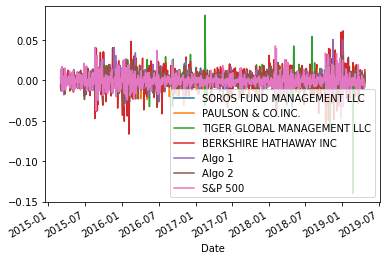

In [27]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot()

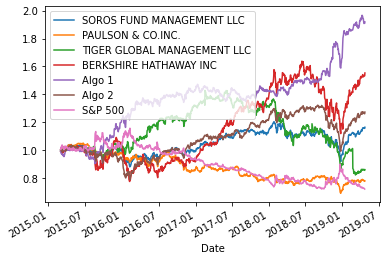

In [28]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1+combined_df).cumprod().plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

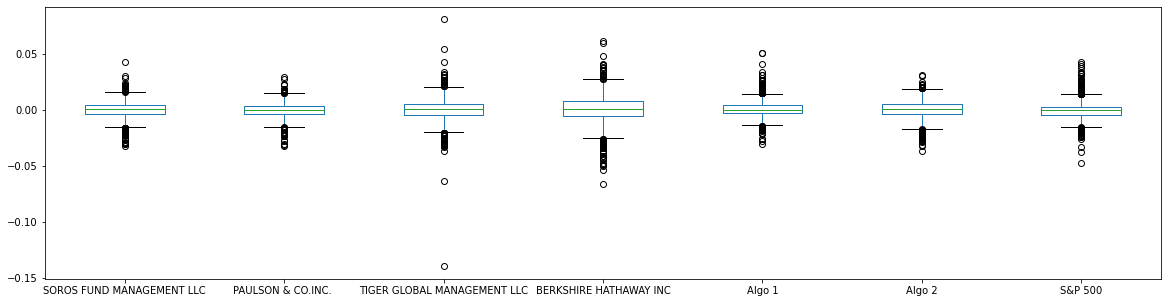

In [29]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,5))


In [30]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
S&P 500                        0.008584
dtype: float64

In [31]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [32]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
volatility = combined_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120987
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132374
S&P 500                        0.136268
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [33]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137


In [34]:
# Construct a correlation table
# YOUR CODE HERE
combined_correlation = combined_df.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,-0.034561
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,-0.002001
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.034561,-0.002001,1.000000


In [35]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = combined_df["SOROS FUND MANAGEMENT LLC"].cov(combined_df["S&P 500"])
covariance

3.889726983063765e-08

In [36]:
variance = combined_df["S&P 500"].var()
variance

7.368637097115585e-05

In [37]:
combined_beta = covariance / variance
combined_beta

0.0005278760416341277

In [38]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_df.ewm(halflife=21).mean()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004999,0.001091,0.004482
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.006235,0.001547,0.002527
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.004849,0.002276,0.005638
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004872,-0.000655,0.003596
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,-0.001182


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [39]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
all_sharpe = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
all_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
S&P 500                       -0.510171
dtype: float64

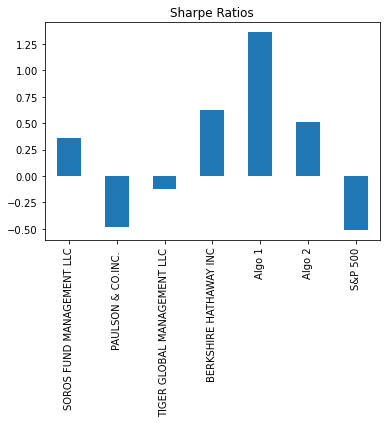

In [40]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe.plot.bar(title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [41]:
# Read the first stock
# YOUR CODE HERE
GOOG_csv = Path("../Resources/goog_historical.csv")
GOOG_df = pd.read_csv(GOOG_csv)

In [42]:
GOOG_df.set_index(pd.to_datetime(GOOG_df["Trade DATE"], infer_datetime_format=True), inplace=True)
GOOG_df.head()

,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,GOOG,5/9/2019,1162.38
2019-05-08,GOOG,5/8/2019,1166.27
2019-05-07,GOOG,5/7/2019,1174.10
2019-05-06,GOOG,5/6/2019,1189.39
2019-05-03,GOOG,5/3/2019,1185.40


In [44]:
GOOG_df.drop(columns=["Trade DATE"], inplace=True)
GOOG_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [51]:
GOOG_returns = GOOG_df.pct_change()
GOOG_returns

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
# Read the second stock
# YOUR CODE HERE
COST_csv = Path("../Resources/cost_historical.csv")
COST_df = pd.read_csv(COST_csv)

In [ ]:
COST_df = COST_df.rename(columns= {"Close":"COST"})
COST_df

In [ ]:
COST_df.set_index(pd.to_datetime(COST_df["Trade DATE"], infer_datetime_format=True), inplace=True)
COST_df.head()

In [ ]:
COST_df.drop(columns=["Trade DATE"], inplace=True)
COST_df.head()

In [ ]:
COST_returns = COST_df.pct_change()
COST_returns.head()

In [ ]:
# Read the third stock
# YOUR CODE HERE
APPL_csv = Path ("../Resources/aapl_historical.csv")
APPL_df = pd.read_csv(APPL_csv)

In [ ]:
APPL_df = APPL_df.rename(columns= {"Close":"APPL"})
APPL_df

In [ ]:
APPL_df.set_index(pd.to_datetime(APPL_df["Trade DATE"], infer_datetime_format=True), inplace=True)
APPL_df.head()

In [ ]:
APPL_df.drop(columns=["Trade DATE"], inplace=True)
APPL_df.head()

In [ ]:
APPL_returns = APPL_df.pct_change()
APPL_returns.head()

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks_df = pd.concat([GOOG_returns, COST_returns, APPL_returns], axis="columns", join="inner")
all_stocks_df

In [ ]:
# Reset the index
# YOUR CODE HERE
all_stocks_df.reset_index()


In [ ]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
all_stocks_df.pivot_table(values="GOOGLE", index="Date",)
all_stocks_df

In [ ]:
# Drop Nulls
# YOUR CODE HERE
all_stocks_df = all_stocks_df.dropna()
all_stocks_df


In [ ]:
## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock


In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weighted_returns = all_stocks_df.dot(weights)
weighted_returns

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df['custom_portfolio']= weighted_returns
combined_df

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df.dropna()


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE
volatility = portfolio_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

In [ ]:
# Rolling
# YOUR CODE HERE
portfolio_df.rolling(window=7).mean().plot()

In [ ]:
portfolio_df.rolling(window=7).std().plot()

In [ ]:
 # Annualized Sharpe Ratios
# YOUR CODE HERE
all_sharpe = portfolio_df.mean()*252/(portfolio_df.std()*np.sqrt(252))
all_sharpe

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe.plot.bar()

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE
price_correlation = portfolio_df.corr()
price_correlation

In [ ]:
covariance = portfolio_df['GOOGLE'].cov(portfolio_df['S&P 500'])
covariance

In [ ]:
variance =portfolio_df['GOOGLE'].var()
variance

In [ ]:
# Beta
# YOUR CODE HERE
portfolio_beta = covariance / variance
portfolio_beta